#View Data

In [1]:
# Step 1: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load all CSV files
orders = pd.read_csv('orders.csv')
order_details = pd.read_csv('order_details.csv')
pizzas = pd.read_csv('pizzas.csv')
# Specify the encoding for the pizza_types.csv file
pizza_types = pd.read_csv('pizza_types.csv', encoding='latin-1')

# Step 3: View the first few rows of each table
print("Orders:")
print(orders.head())

print("\nOrder Details:")
print(order_details.head())

print("\nPizzas:")
print(pizzas.head())

print("\nPizza Types:")
print(pizza_types.head())


Orders:
   order_id        date      time
0         1  2015-01-01  11:38:36
1         2  2015-01-01  11:57:40
2         3  2015-01-01  12:12:28
3         4  2015-01-01  12:16:31
4         5  2015-01-01  12:21:30

Order Details:
   order_details_id  order_id       pizza_id  quantity
0                 1         1     hawaiian_m         1
1                 2         2  classic_dlx_m         1
2                 3         2  five_cheese_l         1
3                 4         2    ital_supr_l         1
4                 5         2     mexicana_m         1

Pizzas:
     pizza_id pizza_type_id size  price
0   bbq_ckn_s       bbq_ckn    S  12.75
1   bbq_ckn_m       bbq_ckn    M  16.75
2   bbq_ckn_l       bbq_ckn    L  20.75
3  cali_ckn_s      cali_ckn    S  12.75
4  cali_ckn_m      cali_ckn    M  16.75

Pizza Types:
  pizza_type_id                          name category  \
0       bbq_ckn    The Barbecue Chicken Pizza  Chicken   
1      cali_ckn  The California Chicken Pizza  Chicken   
2   c

#Checking Null Values in all 4 tables

**1.Orders Table**

In [2]:
print("Null values in orders:")
print(orders.isnull().sum())


Null values in orders:
order_id    0
date        0
time        0
dtype: int64


**2.Order_details Table**

In [3]:
print("\nNull values in order_details:")
print(order_details.isnull().sum())



Null values in order_details:
order_details_id    0
order_id            0
pizza_id            0
quantity            0
dtype: int64


**3.Pizzas Table**

In [4]:
print("\nNull values in pizzas:")
print(pizzas.isnull().sum())



Null values in pizzas:
pizza_id         0
pizza_type_id    0
size             0
price            0
dtype: int64


**4.Pizzas_types Table**

In [5]:
print("\nNull values in pizza_types:")
print(pizza_types.isnull().sum())



Null values in pizza_types:
pizza_type_id    0
name             0
category         0
ingredients      0
dtype: int64


There's no any null values , good to go with this  data set

#Merging all 4 tables

In [6]:
# Merge order_details with pizzas
merged1 = order_details.merge(pizzas, on='pizza_id')

# Merge with pizza_types
merged2 = merged1.merge(pizza_types, on='pizza_type_id')

# Merge with orders
final_data = merged2.merge(orders, on='order_id')

# See final data
final_data.head()


,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,date,time
0,1,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01,11:38:36
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2015-01-01,11:57:40
2,3,2,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2015-01-01,11:57:40
3,4,2,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2015-01-01,11:57:40
4,5,2,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-01-01,11:57:40


#Cleaned dataset (`merged_pizza_data.csv`)

In [8]:
final_data.to_csv('merged_pizza_data.csv', index=False)


In [9]:
from google.colab import files
files.download('merged_pizza_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Daily Sales Time Series Analysis

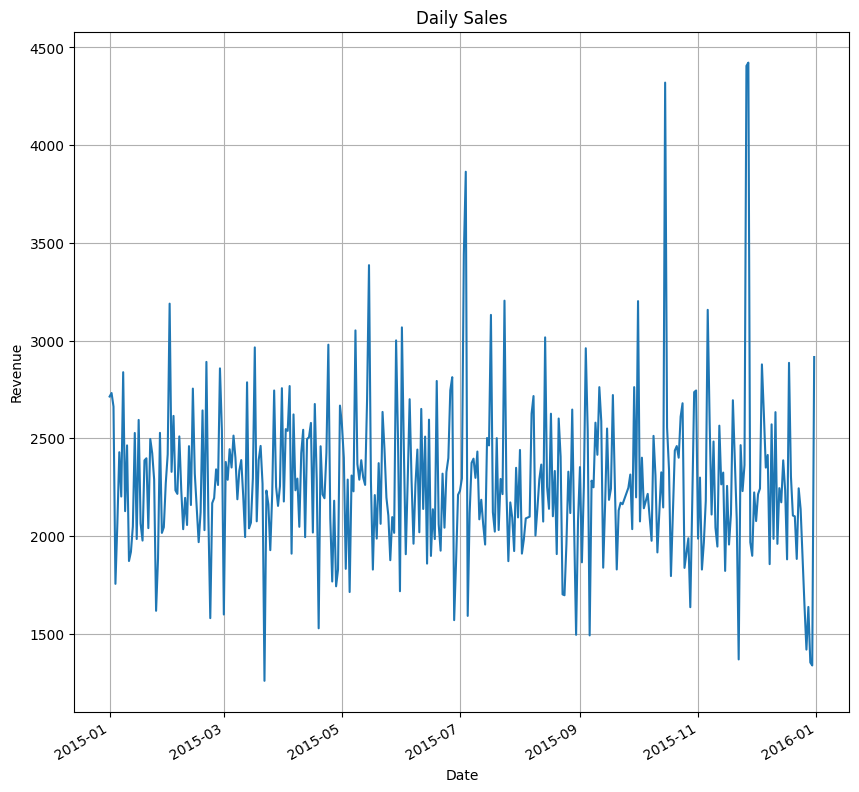

In [7]:
# Convert date column to datetime format
final_data['date'] = pd.to_datetime(final_data['date'])

# Calculate total revenue per day
final_data['total_price'] = final_data['price'] * final_data['quantity']
daily_sales = final_data.groupby('date')['total_price'].sum()

# Plot
plt.figure(figsize=(10,10))
daily_sales.plot(kind='line', title='Daily Sales')
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.grid()
plt.show()



This time series plot shows the daily revenue generated by the pizza shop throughout the year 2015.

**Observations:**
- Daily sales mostly range between 2000 and 3000, with occasional spikes above 4000.
- There are frequent short-term fluctuations, indicating high daily variability in sales.
- Several sharp peaks may suggest high-demand day or possibly weekends or special promotions.
- There are also visible dips, which could be due to low customer turnout, holidays, or off-peak seasons

**Insights:**
- The shop experiences inconsistent daily revenue, highlighting the importance of identifying what drives high-sale days.
- Understanding these patterns can help in predicting peak demand periods, planning promotions, and optimizing staffing.

#Sales Perfomance Analysis

**1.Sales by Pizza Category**

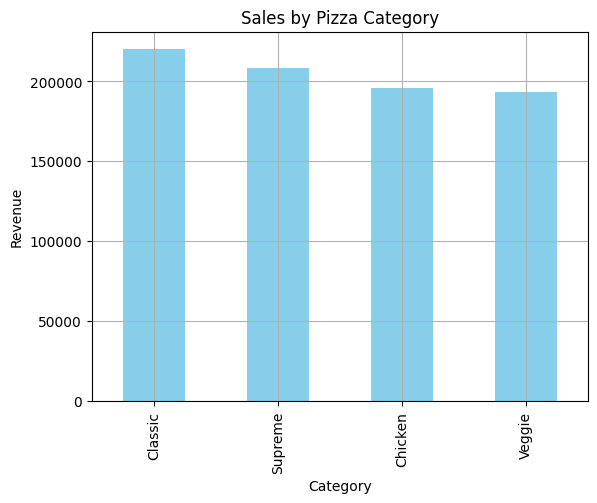

In [ ]:
category_sales = final_data.groupby('category')['total_price'].sum().sort_values(ascending=False)

category_sales.plot(kind='bar', title='Sales by Pizza Category', ylabel='Revenue', xlabel='Category', color='skyblue')
plt.grid()
plt.show()


This bar chart displays the total revenue generated by each pizza category.
**Observations:**
- Classic pizzas generate the highest total revenue, making them the top-performing category.
- Supreme and category follow behind, showing moderate contribution to overall sales.
- Veggie pizzas and  chicken pizzas contribute the least to revenue, indicating lower customer preference or demand.

**Insights:**
- The dominance of classic pizzas suggests they are customer favorites and likely have high sales volume and/or higher pricing.
- The low performance of veggie pizzas could be due to limited vegetarian customer base, less attractive offerings, or pricing mismatch.

**2.Sales by Pizza Size**

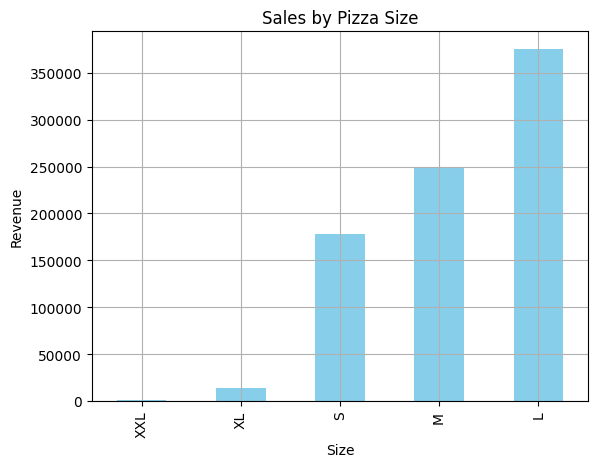

In [ ]:
size_sales = final_data.groupby('size')['total_price'].sum().sort_values()

size_sales.plot(kind='bar', title='Sales by Pizza Size', ylabel='Revenue', xlabel='Size', color='skyblue')
plt.grid()
plt.show()


This bar chart presents the total revenue generated by different pizza sizes.

**Observations:**
- Large pizzas contribute the most to revenue, exceeding 350,000, making them the most preferred size by customers.
- Medium pizzas follow with approximately 250,000, indicating strong demand as well.
- Small pizzas generate between 150,000 and 200,000, showing moderate but consistent contribution.
- Extra Large (XL) pizzas bring in very low revenue (below 25,000), while XXL pizzas contribute almost nothing to overall sales.

**Insights:**
- Customers clearly favor larger portions, especially Large and Medium sizes.
- The very low revenue from XL and XXL sizes suggests these options are either rarely ordered, overpriced, or not well-promoted.
- Small pizzas may appeal to individual or budget-conscious buyers, but their impact is limited compared to larger sizes

3.Top 10 Best Selling Pizzas

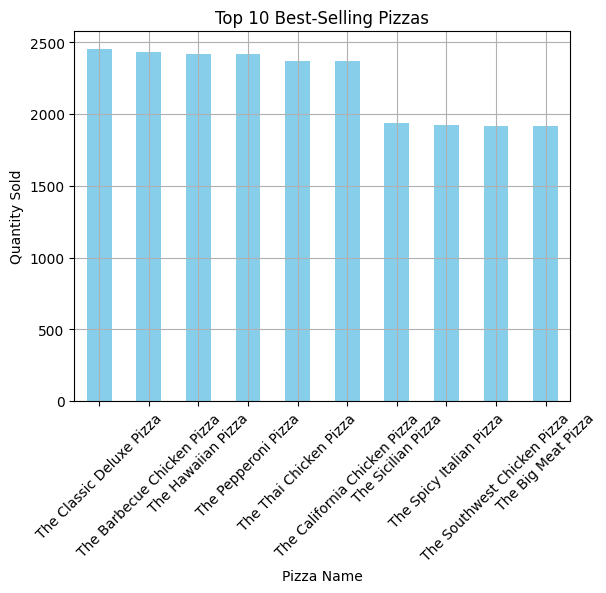

In [ ]:
top_pizzas = final_data.groupby('name')['quantity'].sum().sort_values(ascending=False).head(10)

top_pizzas.plot(kind='bar', title='Top 10 Best-Selling Pizzas', color='skyblue')
plt.ylabel('Quantity Sold')
plt.xlabel('Pizza Name')
plt.xticks(rotation=45)
plt.grid()
plt.show()


This bar chart displays the top 10 most frequently sold pizzas based on total quantity ordered.

**Observations:**
- The Classic Deluxe Pizza holds the top spot, closely followed by The Barbecue Chicken Pizza and The Hawaiian Pizza.
- All top five pizzas sold over around 2400 units, indicating strong and consistent customer preference.
- Pizzas like The Spicy Italian, The Southwest Chicken, and The Big Meat Pizza round out the top 10 with slightly lower but still significant sales.

**Insights:**
- A mix of classic, chicken-based, and internationally inspired pizzas dominate the list, suggesting diverse but familiar customer taste preferences.
- High-performing pizzas likely contribute significantly to overall revenue and should be prioritized in promotions and inventory planning.

#Customer Behavior Analysis

**Peak Order times**

/tmp/ipython-input-12-1336176617.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  final_data['hour'] = pd.to_datetime(final_data['time']).dt.hour


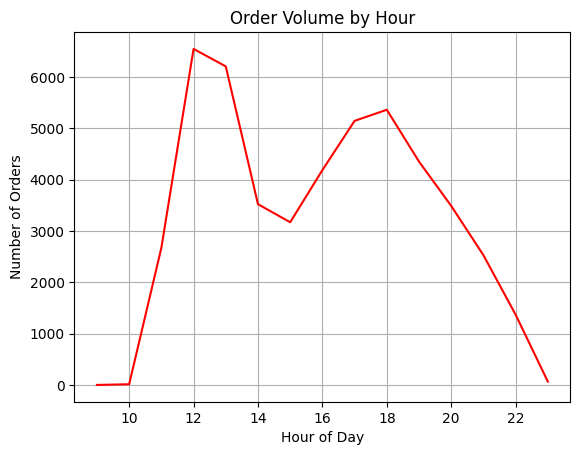

In [ ]:
final_data['hour'] = pd.to_datetime(final_data['time']).dt.hour
hourly_orders = final_data.groupby('hour')['order_id'].count()

hourly_orders.plot(kind='line', title='Order Volume by Hour', color='red')
plt.ylabel('Number of Orders')
plt.xlabel('Hour of Day')
plt.grid()
plt.show()


This line chart shows the number of orders placed at each hour of the day, providing insight into customer ordering patterns.

**Observations:**
- Order volume begins to rise after 10 AM, peaking around 12 PM (noon) — the highest point of the day.
- A second, smaller peak occurs around 6 PM, indicating another surge in demand during dinner time.
- There is a significant drop in orders after 8 PM, with very few orders seen after 10 PM.
- Early morning hours (before 10 AM) show almost no order activity, indicating very low or no demand during breakfast hours.

**Insights:**
- The pizza shop experiences two major rush hours — one at lunchtime (12 PM) and another at dinnertime (6 PM).
- These time windows are crucial for sales maximization and operational efficiency.
- The post-lunch dip and gradual decline after dinner suggest that most of the sales happen between 11 AM and 8 PM.

#Menu Optimization

**Profitability by Pizza**

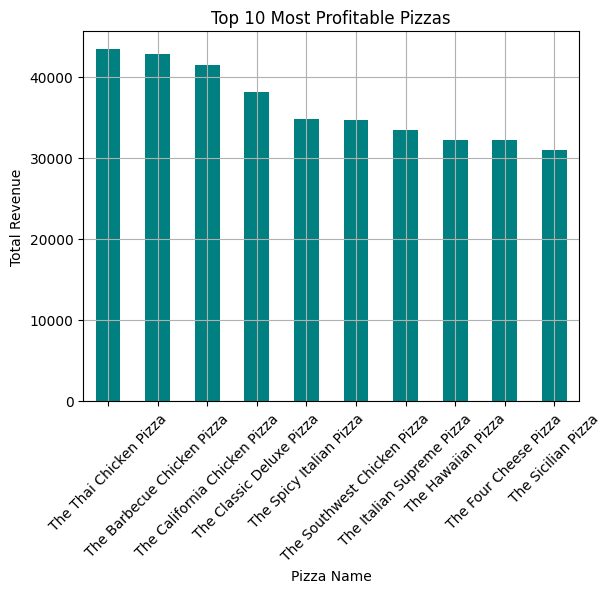

In [ ]:
pizza_profit = final_data.groupby('name')['total_price'].sum().sort_values(ascending=False)

pizza_profit.head(10).plot(kind='bar', title='Top 10 Most Profitable Pizzas', color='teal')
plt.ylabel('Total Revenue')
plt.xlabel('Pizza Name')
plt.xticks(rotation=45)
plt.grid()
plt.show()
